In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the dataset
data = pd.read_csv('/content/creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
count

In [4]:
data.isnull().sum().max()

0

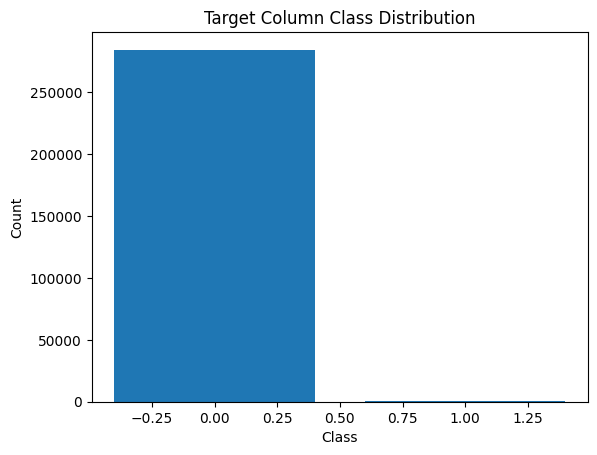

No Fraud are 284315  or  99.83 % of the dataset
Fraud are 492  or  0.17 % of the dataset


In [20]:

# Get the target column
target_column = data['Class']

# Count the number of occurrences for each class
class_counts = target_column.value_counts()

# Create a bar chart
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Target Column Class Distribution')
plt.show()


print('No Fraud are',data['Class'].value_counts()[0],' or ', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Fraud are', data['Class'].value_counts()[1],' or ', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

In [6]:
# Prepare the data
X = data.drop('Class', axis = 1)
y = data['Class']
X_scaled = preprocessing.scale(X)

In [7]:
# apply pca for all components for visualization purposes
pca = PCA()
prin_comp = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data = prin_comp)

Text(0, 0.5, 'Cumulative Explained Variance')

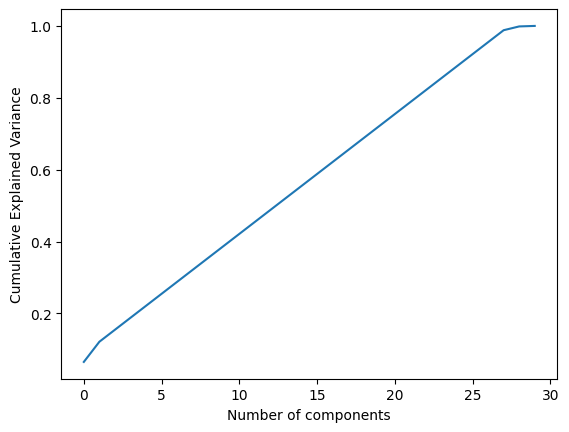

In [8]:
# line graph of cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')

In [9]:
# Get the explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Convert the ratios to percentages
explained_variances = explained_variance_ratios * 100

# Get the principal components
principal_components = prin_comp

# Print the information
for i, (eigenvalue, eigenvector) in enumerate(zip(explained_variances, principal_components)):
    print(f"PC{i + 1}:{eigenvalue:.2f}% ")
    #print(f"- Explained Variance: {eigenvalue:.2f}%")

PC1:6.53% 
PC2:5.61% 
PC3:3.33% 
PC4:3.33% 
PC5:3.33% 
PC6:3.33% 
PC7:3.33% 
PC8:3.33% 
PC9:3.33% 
PC10:3.33% 
PC11:3.33% 
PC12:3.33% 
PC13:3.33% 
PC14:3.33% 
PC15:3.33% 
PC16:3.33% 
PC17:3.33% 
PC18:3.33% 
PC19:3.33% 
PC20:3.33% 
PC21:3.33% 
PC22:3.33% 
PC23:3.33% 
PC24:3.33% 
PC25:3.33% 
PC26:3.33% 
PC27:3.33% 
PC28:3.33% 
PC29:1.05% 
PC30:0.14% 


In [10]:
pca_85 = PCA(.85) #to check 85% variance retention
pca_85.fit_transform(X_scaled)

print(round(pca_85.explained_variance_ratio_.sum()*100,1),"% of variance is explained by",pca_85.n_components_,"components.")

85.5 % of variance is explained by 24 components.


In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Apply PCA for dimensionality reduction
t0 = time()
pca = PCA(n_components=24)  # Reduce to 24 components for visualizatio
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
t1 = time()
print('PCA runtime = ' + str(t1-t0)+'s.')

PCA runtime = 0.8920259475708008s.


In [13]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_pca, y_train)

LogisticRegression()

In [14]:
# Make predictions
y_pred = model.predict(X_test_pca)

In [16]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
labels = ['No Fraud','Fraud']
# Print the evaluation results
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names = labels))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     85295
       Fraud       0.82      0.59      0.69       148

    accuracy                           1.00     85443
   macro avg       0.91      0.80      0.84     85443
weighted avg       1.00      1.00      1.00     85443



In [19]:
conf_matrix_df = pd.DataFrame(data=confusion_matrix(y_test, y_pred), index = labels, columns = labels)

conf_matrix_df

,No Fraud,Fraud
No Fraud,85276,19
Fraud,60,88
